In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing, model_selection
import csv
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import time
import json
import random

In [4]:
np.arange(6)

array([0, 1, 2, 3, 4])

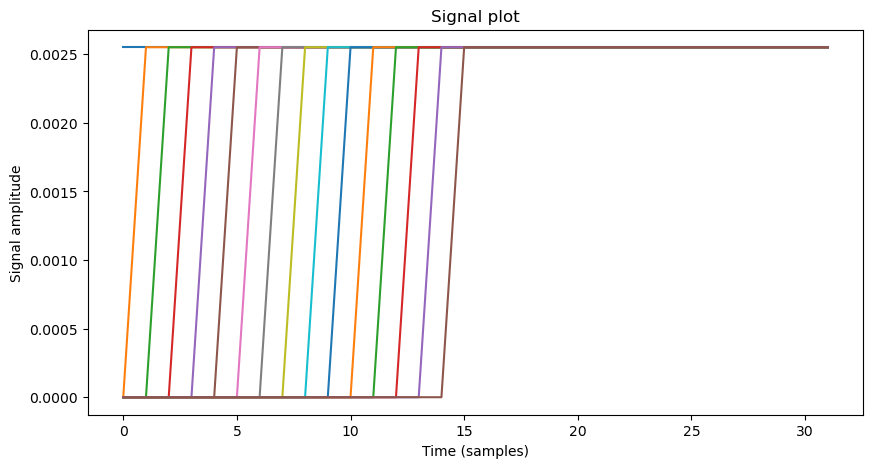

In [9]:
# def triangle_kernel(kerlen):
#     r = np.arange(kerlen)
#     kernel1d = (kerlen + 1 - np.abs(r - r[::-1])) / 2
#     kernel2d = np.outer(kernel1d, kernel1d)
#     kernel2d /= kernel2d.sum()
#     return kernel2d

import numpy as np

height = 16  # height of the isosceles triangle
base = 32  # base of the isosceles triangle
filter = np.tri(base, height, dtype=float)  # create a lower-triangular matrix with the desired shape
filter /= np.sum(filter)  # normalize the values so that they sum to 1

fig, ax = plt.subplots(figsize=(10, 5))
# Plot the signal
ax.plot(filter)
ax.set_xlabel('Time (samples)')
ax.set_ylabel('Signal amplitude')
ax.set_title('Signal plot')
plt.show()

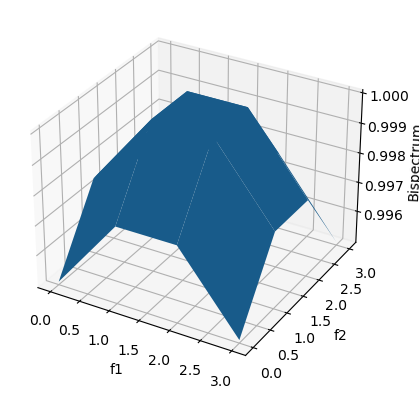

[[0.99501248 0.99750312 0.99750312 0.99501248]
 [0.99750312 1.         1.         0.99750312]
 [0.99750312 1.         1.         0.99750312]
 [0.99501248 0.99750312 0.99750312 0.99501248]]


In [3]:
k = 4
l = 4

def gkernel(k=2, l=1, sig=20):
    """\
    Gaussian Kernel Creator via given length and sigma
    """

    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    bx = np.linspace(-(k - 1) / 2., (k - 1) / 2., k)

    xx, yy = np.meshgrid(ax, bx)

    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))

    return kernel / np.max(kernel)

# Plot the bispectrum using contour plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(k), np.arange(l))
ax.plot_surface(X, Y, gkernel(k, l))
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('Bispectrum')
plt.show()
print(gkernel(k, l))

## Test

[128, 64, 32, 16, 8]
[128, 64, 32, 16, 16]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


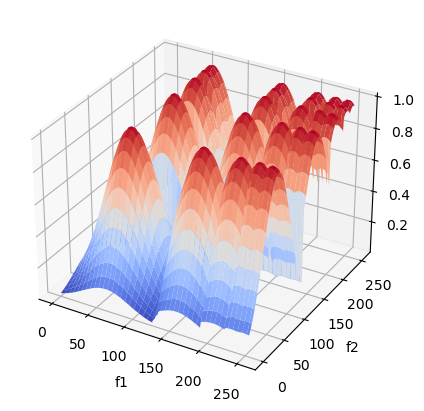

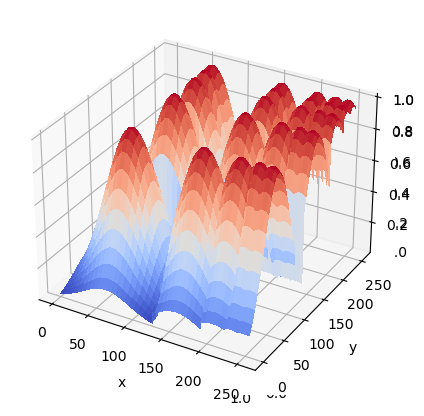

In [10]:
import numpy as np
import matplotlib.pyplot as plt
bis_dim = 256
sigma = bis_dim//8
if sigma == 0:
     sigma = 1
filter_dim = 5
big_fil_size = bis_dim //2
fil_size = [big_fil_size // (2 ** i) for i in range(filter_dim)]
if sum(fil_size) != bis_dim:
        fil_size = [value for value in fil_size if value != 0]
        if len(fil_size) == 1:
             fil_size.append(fil_size[0])
        print(fil_size)
fil_size[-1] = fil_size[-2] 
print(fil_size)
overall = np.zeros([bis_dim,bis_dim])
print(overall)
xtrack = 0
ytrack = 0
for xdim in range(len(fil_size)):
    for ydim in range(len(fil_size)):
        x,y = fil_size[xdim], fil_size[ydim]
        # print(xtrack, ytrack)
        Pyramid = gkernel(x, y, sigma)
        # fig = plt.figure()
        # ax = plt.axes(projection="3d")
        # x2d, y2d = np.meshgrid(np.arange(y), np.arange(x))
        # ax.plot_surface(x2d, y2d, Pyramid)
        # ax.set_xlabel('x')
        # ax.set_ylabel('y')
        # ax.set_zlabel('height')
        # print(xtrack, ytrack)
        # plt.show()
        overall[xtrack:xtrack+x, ytrack:ytrack+y] = Pyramid
        ytrack = ytrack+y
    ytrack = 0
    xtrack = xtrack+x

# x, y = np.meshgrid(np.arange(bis_dim), np.arange(bis_dim))
# z = overall
# z = z[:-1, :-1]
# z_min, z_max = -np.abs(z).max(), np.abs(z).max()
# print(overall)
# plt.subplot()

# plt.pcolormesh(x, y, z, 
#             cmap =cm.coolwarm, 
#             vmin = z_min, 
#             vmax = z_max,
#             edgecolors = 'face',
#             shading ='flat')

# plt.title('Filter')

# set the limits of the plot
# to the limits of the data
# plt.axis([x.min(), x.max(), y.min(), y.max()])

# plt.colorbar()
# plt.show()

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')
# ax.zaxis.set_major_formatter(ticker.EngFormatter(unit=''))
X, Y = np.meshgrid(np.arange(bis_dim), np.arange(bis_dim))
ax.plot_surface(X, Y, overall, cmap =cm.coolwarm)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
plt.show()


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


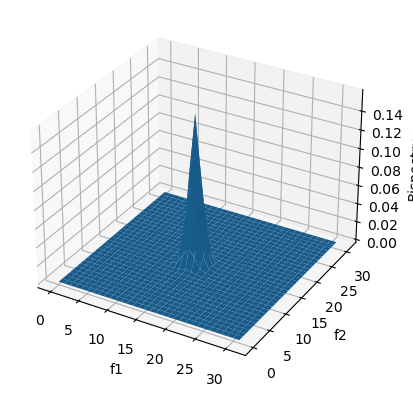

In [19]:
import numpy as np
from scipy.ndimage import gaussian_filter

# Define the size of the kernel
m, n = 32, 32

# Define the standard deviation of the Gaussian distribution
sigma = 1

# Create an empty kernel matrix of zeros
kernel = np.zeros((m, n))

# Calculate the center of the kernel
center = (m - 1) // 2, (n - 1) // 2

# Set the value of the center of the kernel to 1
kernel[center] = 1

# Apply the Gaussian filter to the kernel
kernel = gaussian_filter(kernel, sigma=sigma)

print(kernel)

# Plot the bispectrum using contour plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.arange(m), np.arange(n))
ax.plot_surface(X, Y, kernel)
ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('Bispectrum')
plt.show()

In [1]:
initial_value = 128
num_elements = 5

my_list = [initial_value // (2 ** i) for i in range(num_elements)]
print(my_list)

[128, 64, 32, 16, 8]
